## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(
    input_shape,
    acti="relu", 
    dropRate=.25,
    class_num=10, 
    unitArray=[512, 256, 128, 64]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)

    for idx, unit in enumerate(unitArray): 
        if idx == 0:
            x = keras.layers.Dense(units=unit, activation=acti)(input_layer)
        else:
            x = keras.layers.Dense(units=unit, activation=acti)(x)
    
    x = keras.layers.Dropout(dropRate)(x)
    result = keras.layers.Dense(units=class_num, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[result])

    return model

In [6]:
"""Code Here
設定超參數
"""

LR = 0.001
BATCH_SIZE = 256
EPOCH = 50

adam = keras.optimizers.Adam(lr=LR)

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

keras.backend.clear_session()
model = build_mlp(x_train.shape[1:])
model.compile(
    optimizer=adam,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCH,
    validation_data=(x_test, y_test)
)

results["first"] = {
        "acc":model.history.history["accuracy"],
        "val_acc":model.history.history["val_accuracy"],
        "loss":model.history.history["loss"],
        "val_loss":model.history.history["val_loss"]
    }

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.0372 - accuracy: 0.2510 - val_loss: 1.8441 - val_accuracy: 0.3312
Epoch 2/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.8052 - accuracy: 0.3493 - val_loss: 1.7119 - val_accuracy: 0.3782
Epoch 3/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.7170 - accuracy: 0.3856 - val_loss: 1.6210 - val_accuracy: 0.4206
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6420 - accuracy: 0.4169 - val_loss: 1.5812 - val_accuracy: 0.4338
Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5904 - accuracy: 0.4328 - val_loss: 1.5808 - val_accuracy: 0.4378
Epoch 6/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5610 - accuracy: 0.4437 - val_loss: 1.5135 - val_accuracy: 0.4665
Epoch 7/50
50000/50000 [==============================] - 3s 63us/st

No handles with labels found to put in legend.


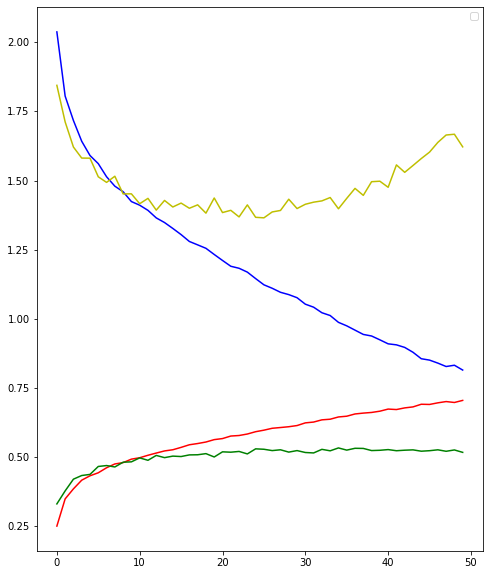

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

cArray = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,10))    
for idx, name in enumerate(results["first"].keys()):
    plt.plot(
        range(len(results["first"]["acc"])),
        results["first"][name],
        "-",
        c=cArray[idx]
    )
    
plt.legend()
plt.show()